# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Файл содержит инфомацию о недвижимости в Санкт-Петербурге и его окрестностях(23699 строчек), данные охарактеризованы 22 признаками. Также таблица содержит много пропусков, которые необходимо заполнить.

### Шаг 2. Предобработка данных

In [3]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Обработка пропусков.

Создадим функцию, вычисляющую процент пропущенных значений.

In [4]:
def gaps (column):
    return print ('Пропущено {:.1%}'.format(df[column].isna().value_counts()[1] / len(df), 2))

В столбцах ceiling_height, living_area, kitchen_area заменим пропуски на медианное значение.

In [5]:
gaps('ceiling_height')

Пропущено 38.8%


In [6]:
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

In [7]:
gaps('living_area')

Пропущено 8.0%


In [8]:
df['living_area'] = df['living_area'].fillna(df['living_area'].median())
df['living_area'].isna().value_counts()

False    23699
Name: living_area, dtype: int64

In [9]:
gaps('kitchen_area')

Пропущено 9.6%


In [10]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
df['kitchen_area'].isna().value_counts()

False    23699
Name: kitchen_area, dtype: int64

In [11]:
gaps('balcony')

Пропущено 48.6%


In [12]:
gaps('parks_around3000')

Пропущено 23.3%


In [13]:
gaps('ponds_around3000')

Пропущено 23.3%


Предположим, что раз не указаны значения количества балконов, то их нет. Так же поступим с парками и озерами.

In [14]:
df['balcony']=df['balcony'].fillna(0, inplace=True)
df['parks_around3000']=df['parks_around3000'].fillna(0,inplace=True)
df['ponds_around3000']=df['ponds_around3000'].fillna(0,inplace=True)

In [15]:
gaps('locality_name')

Пропущено 0.2%


In [16]:
gaps('floors_total')

Пропущено 0.4%


Так как пропусков с названиями населенных пунктов очень мало, можно смело их удалить. Тоже самое с этажами.

In [17]:
df.dropna(subset = ['locality_name'], inplace = True)
df.dropna(subset=['floors_total'], inplace=True)

In [18]:
gaps('airports_nearest')

Пропущено 23.4%


In [19]:
gaps('cityCenters_nearest')

Пропущено 23.3%


In [20]:
gaps('is_apartment')

Пропущено 88.3%


In [21]:
gaps('ponds_nearest')

Пропущено 61.7%


In [22]:
gaps('parks_nearest')

Пропущено 65.9%


In [23]:
gaps('days_exposition')

Пропущено 13.5%


In [24]:
df.loc[df['days_exposition'].isna(), 'days_exposition'] = df['days_exposition'].describe()

#### Вывод по пропускам.

Просмотрев данные, мы заметили пропуски в различных столбцах и заменили их, где посчитали необходимым.

### Изменение типов данных.

In [25]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

#### Вывод по изменению типов данных.

Тип данных в столбце first_day_exposition был заменен со строчного на временной

### Шаг 3. Посчитайте и добавьте в таблицу

Цена квадратного метра:

In [26]:
df['price_m2']=round(df['last_price']/df['total_area'],1)

День недели, месяц и год публикации объявления:

In [27]:
df['weekday']=df['first_day_exposition'].dt.weekday
df['month']=df['first_day_exposition'].dt.month
df['year']=df['first_day_exposition'].dt.year

Этаж квартиры:

In [28]:
def floor_flat (df):
    if df['floor']==1:
        return 'первый этаж'
    if df['floor']==df['floors_total']:
        return 'последний этаж'
    else:
        return 'другой'

df['floor_flat']=df.apply(floor_flat,axis=1)

Соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [29]:
df['ratio_living_area']=df['living_area']/df['total_area']
df['ratio_kitchen_area']=df['kitchen_area']/df['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

На данном этапе исследования необходимо исбавиться от выбросов.

#### Функция для вычисления границ "усов" :

In [30]:
def det_whiskers(column):
    stat = df[column].describe()
    iqr = stat[6] - stat[4]   
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)
    if left_whisker < stat[3]: left_whisker = stat[3] 
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]

#### Гистограмма для общей площади:

In [31]:
det_whiskers('total_area')

[12.0, 114.25]

In [32]:
df['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

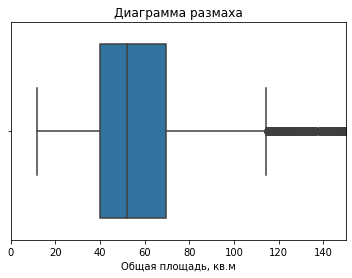

In [33]:
sns.boxplot(df['total_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0, 150)
plt.show()

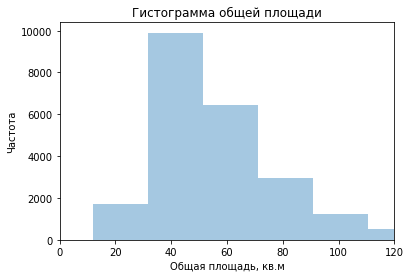

In [34]:
sns.distplot(df['total_area'], kde=False, bins=45)
plt.xlim(0, 120)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

In [35]:
df['verylarge_area'] = df['total_area'] > det_whiskers('total_area')[1]

#### Гистограмма для цены:

In [36]:
det_whiskers('last_price')

[12190.0, 11875000.0]

In [37]:
df['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

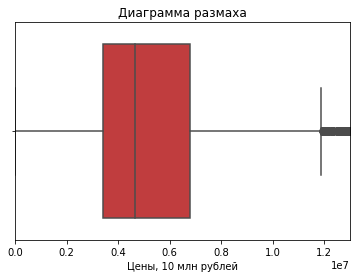

In [38]:
sns.boxplot(df['last_price'], color='tab:red')
plt.title('Диаграмма размаха')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.xlim(0, 13000000)

In [39]:
df['too_expensive'] = df['last_price'] > det_whiskers('last_price')[1]

#### Гистограмма для количества комнат:

In [40]:
det_whiskers('rooms')

[0.0, 6.0]

In [41]:
df['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

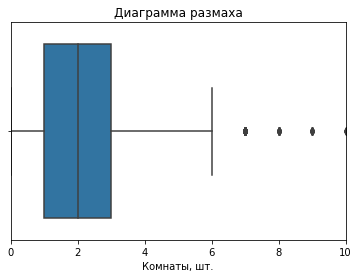

In [42]:
sns.boxplot(df['rooms'])
plt.title('Диаграмма размаха')
plt.xlabel('Комнаты, шт.')
_ = plt.xlim(0, 10)

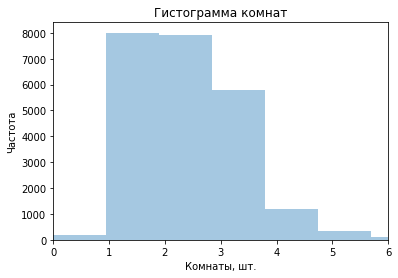

In [43]:
sns.distplot(df['rooms'], kde=False, bins=20)
plt.xlim(0, 6)
plt.title('Гистограмма комнат')
plt.xlabel('Комнаты, шт.')
_ = plt.ylabel('Частота')

In [44]:
df['too_many_rooms'] = df['rooms'] > det_whiskers('rooms')[1]

#### Гистограмма для высоты потолков:

In [45]:
det_whiskers('ceiling_height')

[2.45, 2.85]

In [46]:
df['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

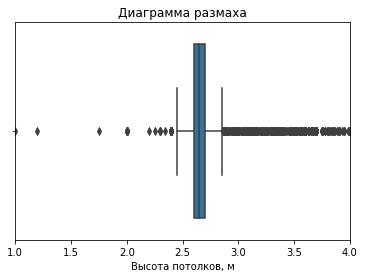

In [47]:
sns.boxplot(df['ceiling_height'])
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков, м')
_ = plt.xlim(1, 4)

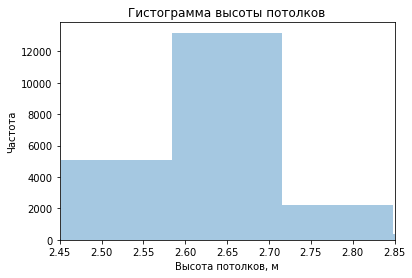

In [48]:
sns.distplot(df['ceiling_height'], kde=False, bins=750)
plt.xlim(det_whiskers('ceiling_height')[0], det_whiskers('ceiling_height')[1])
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
_ = plt.ylabel('Частота')

In [49]:
df['veryhigh_ceiling']=df['ceiling_height']>det_whiskers('ceiling_height')[1]

### Изучение времени продаж квартиры

In [50]:
det_whiskers('days_exposition')

[1.0, 510.0]

In [51]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

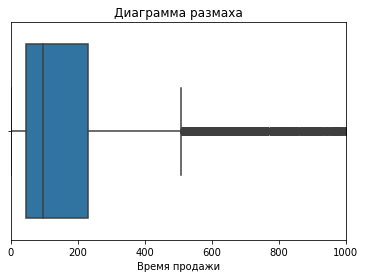

In [52]:
sns.boxplot(df['days_exposition'])
plt.title('Диаграмма размаха')
plt.xlabel('Время продажи')
_ = plt.xlim(0, 1000)

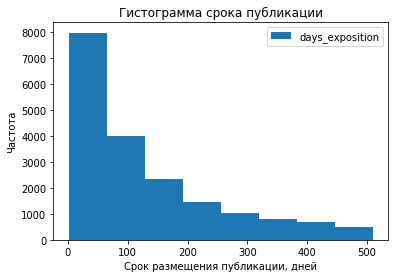

In [53]:
df.plot(y='days_exposition', 
          kind='hist', 
          range=(det_whiskers('days_exposition')[0], det_whiskers('days_exposition')[1]), 
          bins=8)
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок размещения публикации, дней')
_ = plt.ylabel('Частота')

In [54]:
df['too_slow'] = df['days_exposition'] > det_whiskers('days_exposition')[1]
df['too_fast'] = df['days_exposition'] < 30

Смотря на гистограмму, мы замечаем, что большинство продаж происходило за примерно за 95 дней, что подтвеждается медианным значением, но среднее значение почти в 2 раза больше, значит имеется некоторое количество продаж, которые заняли очень большой промужеток времени.

### Убрать редкие и выбивающиеся значения

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 35 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 0 non-null object
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        0 non-null object
parks_nearest           8030 non-null float64
ponds_around3000 

In [56]:
good_data = df[(df['verylarge_area'] == False) & 
     (df['too_expensive'] == False) &
     (df['too_many_rooms'] == False) &
     (df['veryhigh_ceiling'] == False) &
     (df['too_slow'] == False) &
     (df['too_fast'] == False)].reset_index(drop=True)

print('Доля чистых значений составила: {:.1%}'. format(len(good_data) / len(df)))

Доля чистых значений составила: 64.2%


### Какие факторы больше всего влияют на стоимость квартиры?

In [57]:
area_pivot = df.pivot_table(index='total_area', 
               values='last_price', aggfunc=['median', 'count']).reset_index()
area_pivot.columns = ['area', 'median_price', 'count_price']
area_pivot

,area,median_price,count_price
0,12.0,2400000.0,1
1,13.0,1850000.0,3
2,13.2,1686000.0,1
3,14.0,1190000.0,1
4,15.0,1725000.0,2
...,...,...,...
2154,590.0,65000000.0,1
2155,618.0,300000000.0,1
2156,631.0,140000000.0,1
2157,631.2,140000000.0,1


Text(0, 0.5, 'Цена, ₽')

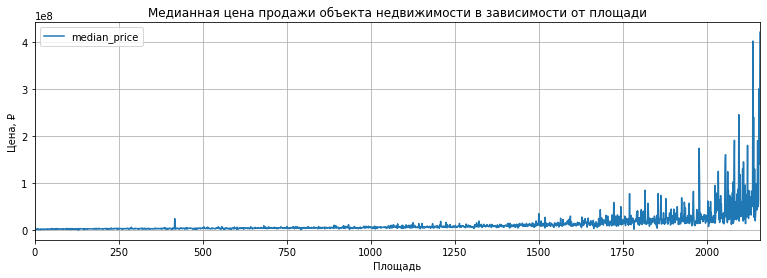

In [58]:
plot = area_pivot.plot(
    y='median_price', figsize=(13,4), grid='True',
    title='Медианная цена продажи объекта недвижимости в зависимости от площади')
plot.set_xlabel('Площадь')
plot.set_ylabel('Цена, ₽')

In [59]:
print(df['total_area'].corr(df['last_price']))

0.6536213939252806


In [60]:
room_pivot = df.pivot_table(index='rooms', 
               values='last_price', aggfunc=['median', 'count']).reset_index()
room_pivot.columns = ['rooms', 'median_price', 'count_price']
room_pivot

,rooms,median_price,count_price
0,0,2700000.0,194
1,1,3600000.0,8004
2,2,4768714.0,7897
3,3,6200000.0,5779
4,4,9000000.0,1172
5,5,14000000.0,325
6,6,19000000.0,104
7,7,24900000.0,59
8,8,23095000.0,12
9,9,23750000.0,8


Text(0, 0.5, 'Цена, ₽')

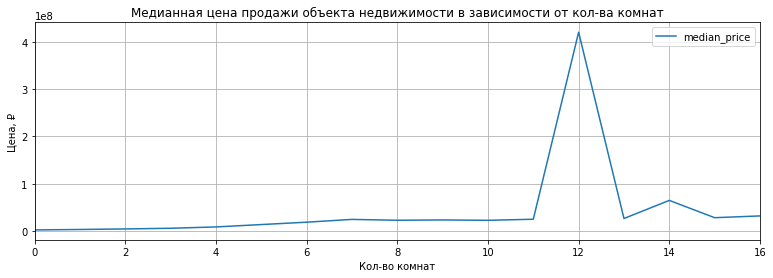

In [61]:
plot = room_pivot.plot(
    y='median_price', figsize=(13,4), grid='True',
    title='Медианная цена продажи объекта недвижимости в зависимости от кол-ва комнат')
plot.set_xlabel('Кол-во комнат')
plot.set_ylabel('Цена, ₽')

In [62]:
print(df['rooms'].corr(df['last_price']))

0.3631905485065748


In [63]:
centre_pivot = df.pivot_table(index='cityCenters_nearest', 
               values='last_price', aggfunc=['median', 'count']).reset_index()
centre_pivot.columns = ['km_center', 'median_price', 'count_price']
centre_pivot

,km_center,median_price,count_price
0,181.0,31099000.0,1
1,208.0,5800000.0,1
2,215.0,10990000.0,1
3,287.0,9590000.0,1
4,291.0,11500000.0,1
...,...,...,...
7618,64857.0,3650000.0,1
7619,65105.0,3300000.0,1
7620,65764.0,4000000.0,1
7621,65952.0,3600000.0,1


Text(0, 0.5, 'Цена, ₽')

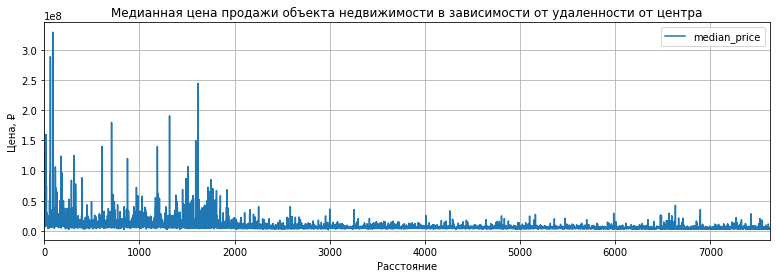

In [64]:
plot = centre_pivot.plot(
    y='median_price', figsize=(13,4), grid='True',
    title='Медианная цена продажи объекта недвижимости в зависимости от удаленности от центра')
plot.set_xlabel('Расстояние')
plot.set_ylabel('Цена, ₽')

In [65]:
print(df['cityCenters_nearest'].corr(df['last_price']))

-0.20635314264311072


In [66]:
floor_pivot = df.pivot_table(index='floor_flat', 
               values='last_price', aggfunc=['median', 'count']).reset_index()
floor_pivot.columns = ['floor_flat', 'median_price', 'count_price']
floor_pivot['floor_names'] = ['другой', 'первый этаж', 'последний этаж']
floor_pivot

,floor_flat,median_price,count_price,floor_names
0,другой,4848500.0,17326,другой
1,первый этаж,3900000.0,2909,первый этаж
2,последний этаж,4300000.0,3330,последний этаж


Text(0, 0.5, 'Цена, ₽')

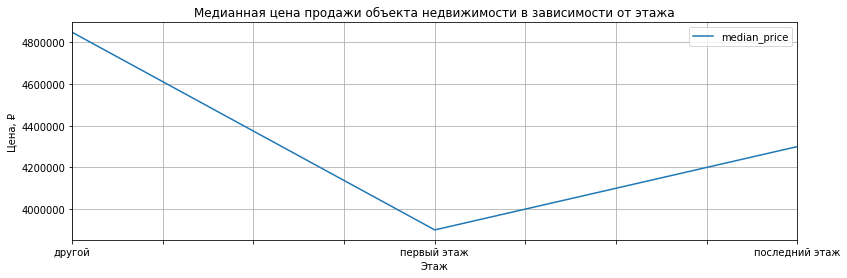

In [67]:
plot = floor_pivot.plot(
    x='floor_names', y='median_price', figsize=(13,4), grid='True',
    title='Медианная цена продажи объекта недвижимости в зависимости от этажа')
plot.set_xlabel('Этаж')
plot.set_ylabel('Цена, ₽')

In [68]:
print(df['floor'].corr(df['last_price']))

0.026841775356835625


In [69]:
weekday_pivot = df.pivot_table(index='weekday', 
               values='last_price', aggfunc=['median', 'count']).reset_index()
weekday_pivot.columns = ['weekday', 'median_price', 'count_price']
weekday_pivot['weekday_names'] = ['Понедельник', 'Вторник', 'Среда', 'Четверг',
                          'Пятница', 'Суббота', 'Воскресенье']
weekday_pivot

,weekday,median_price,count_price,weekday_names
0,0,4650000.0,3596,Понедельник
1,1,4720000.0,4163,Вторник
2,2,4700000.0,3948,Среда
3,3,4650000.0,4276,Четверг
4,4,4550000.0,3980,Пятница
5,5,4550000.0,1919,Суббота
6,6,4530000.0,1683,Воскресенье


Text(0, 0.5, 'Цена, ₽')

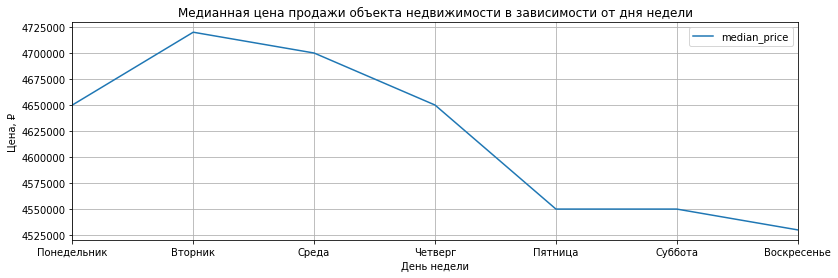

In [70]:
plot = weekday_pivot.plot(
    x='weekday_names', y='median_price', figsize=(13,4), grid='True',
    title='Медианная цена продажи объекта недвижимости в зависимости от дня недели')
plot.set_xlabel('День недели')
plot.set_ylabel('Цена, ₽')

In [71]:
print(df['weekday'].corr(df['last_price']))

0.0013569211122710775


In [72]:
month_pivot = df.pivot_table(index='month', 
               values='last_price', aggfunc=['median', 'count']).reset_index()
month_pivot.columns = ['month', 'median_price', 'count_price']
month_pivot['month_names'] = ['Январь', 'Февраль', 'Март', 'Апрель','Май','Июнь','Июль',
                               'Август','Сентябрь','Октябрь', 'Ноябрь', 'Декабрь']
month_pivot

,month,median_price,count_price,month_names
0,1,4600000.0,1487,Январь
1,2,4650000.0,2636,Февраль
2,3,4650000.0,2575,Март
3,4,4800000.0,2356,Апрель
4,5,4500000.0,1261,Май
5,6,4400000.0,1747,Июнь
6,7,4650000.0,1686,Июль
7,8,4570000.0,1739,Август
8,9,4700000.0,1972,Сентябрь
9,10,4570000.0,2108,Октябрь


Text(0, 0.5, 'Цена, ₽')

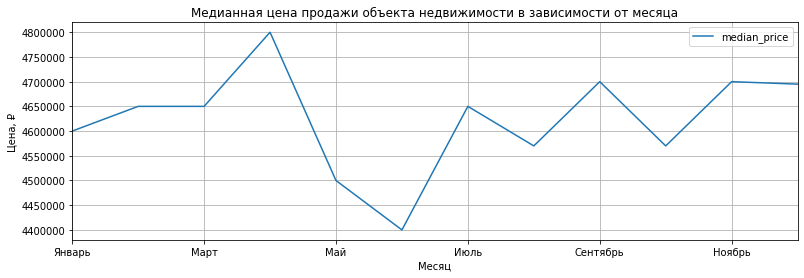

In [73]:
plot = month_pivot.plot(
    x='month_names', y='median_price', figsize=(13,4), grid='True',
    title='Медианная цена продажи объекта недвижимости в зависимости от месяца')
plot.set_xlabel('Месяц')
plot.set_ylabel('Цена, ₽')

In [74]:
print(df['month'].corr(df['last_price']))

0.0027259571647347608


In [75]:
year_pivot = df.pivot_table(index='year', 
               values='last_price', aggfunc=['median', 'count']).reset_index()
year_pivot.columns = ['year', 'median_price', 'count_price']
year_pivot['year_names'] = ['2014','2015','2016','2017','2018','2019']
year_pivot

,year,median_price,count_price,year_names
0,2014,7640000.0,136,2014
1,2015,5300500.0,1166,2015
2,2016,4530000.0,2745,2016
3,2017,4500000.0,8161,2017
4,2018,4550000.0,8486,2018
5,2019,5050000.0,2871,2019


Text(0, 0.5, 'Цена, ₽')

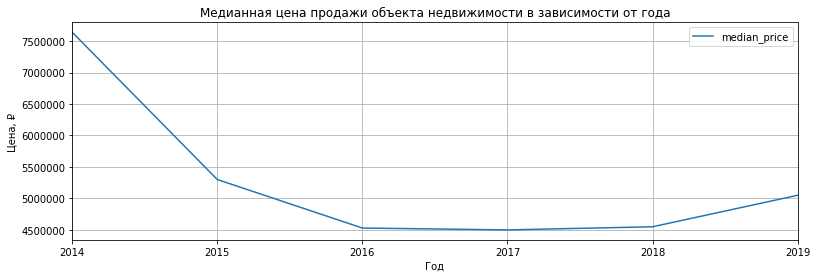

In [76]:
plot = year_pivot.plot(
    x='year_names',y='median_price', figsize=(13,4), grid='True',
    title='Медианная цена продажи объекта недвижимости в зависимости от года')
plot.set_xlabel('Год')
plot.set_ylabel('Цена, ₽')

In [77]:
print(df['year'].corr(df['last_price']))

-0.042864152713611034


### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. 

In [78]:
high_median_price_m2=df.pivot_table(index='locality_name',values='price_m2', aggfunc=['median','count'])
high_median_price_m2.columns=['median','count']
high_median_price_m2.sort_values('count', ascending=False).head(10)

,median,count
locality_name,,
Санкт-Петербург,104774.50,15651
посёлок Мурино,85878.45,520
посёлок Шушары,76829.30,439
Всеволожск,65789.50,398
Пушкин,100000.00,369
Колпино,74723.75,338
посёлок Парголово,91642.90,327
Гатчина,67796.60,307
деревня Кудрово,91860.50,299


### Изучение предложений квартир

In [79]:
df['citycenters_km'] = round(df['cityCenters_nearest'] / 1000, 0)
df['citycenters_km'] = df['citycenters_km'].astype('int', errors='ignore')

good_data = df[(df['verylarge_area'] == False) & 
     (df['too_expensive'] == False) &
     (df['too_many_rooms'] == False) &
     (df['veryhigh_ceiling'] == False) &
     (df['too_slow'] == False) &
     (df['too_fast'] == False)].reset_index(drop=True)

good_data.loc[(good_data['locality_name'] == 'Санкт-Петербург') & 
              (good_data['citycenters_km'].notna()), 'citycenters_km'].apply(round)
peter_data = good_data.query('locality_name == "Санкт-Петербург"')
peter_center_nearest = peter_data.pivot_table(index='citycenters_km', values=['price_m2', 'last_price'], aggfunc='median')
peter_center_nearest.head()

,last_price,price_m2
citycenters_km,,
0.0,6100000.0,126560.65
1.0,7800000.0,107627.10
2.0,8200000.0,114000.00
3.0,6900000.0,109707.70
4.0,6900000.0,112436.10


/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


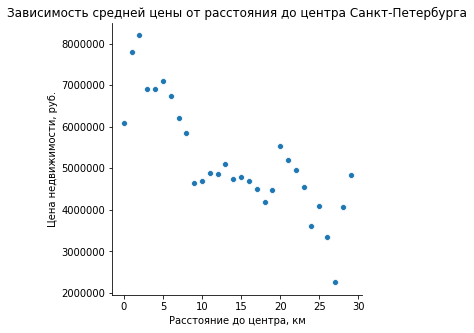

In [80]:
sns.relplot(x=peter_center_nearest.index, y='last_price', data=peter_center_nearest)
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

Большой разрыв происходит примерно в области 7-8 км. Прииймем за центр окружность радиусом 7 км.

In [81]:
peter_center = good_data[(good_data['citycenters_km'] <= 7) & (good_data['locality_name'] == 'Санкт-Петербург')]

### Выделение сегмента квартир в центре

In [82]:
peter_center['total_area'].describe()

count    961.000000
mean      61.849407
std       20.335908
min       12.000000
25%       45.000000
50%       60.000000
75%       75.500000
max      114.200000
Name: total_area, dtype: float64

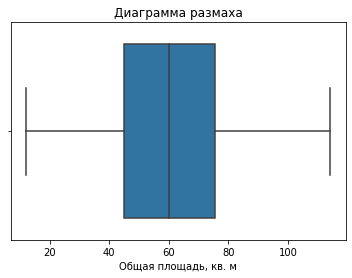

In [83]:
sns.boxplot(peter_center['total_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв. м')
plt.show()

In [84]:
peter_center['last_price'].describe()

count    9.610000e+02
mean     7.178963e+06
std      2.154675e+06
min      2.400000e+06
25%      5.500000e+06
50%      6.950000e+06
75%      8.700000e+06
max      1.186686e+07
Name: last_price, dtype: float64

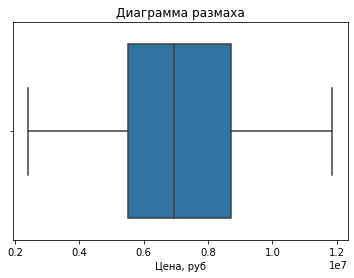

In [85]:
sns.boxplot(peter_center['last_price'])
plt.title('Диаграмма размаха')
plt.xlabel('Цена, руб')
plt.show()

In [86]:
peter_center['rooms'].describe()

count    961.000000
mean       2.140479
std        0.927606
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: rooms, dtype: float64

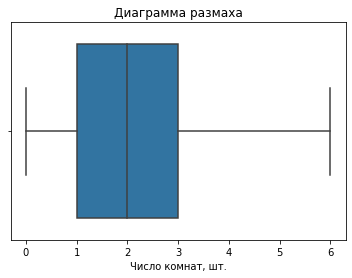

In [87]:
sns.boxplot(peter_center['rooms'])
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат, шт.')
plt.show()

In [88]:
peter_center['cityCenters_nearest'].describe()

count     961.000000
mean     4936.845994
std      1609.286230
min       467.000000
25%      3974.000000
50%      5142.000000
75%      6119.000000
max      7498.000000
Name: cityCenters_nearest, dtype: float64

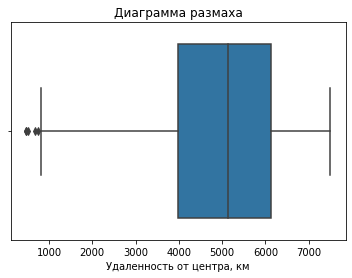

In [89]:
sns.boxplot(peter_center['cityCenters_nearest'])
plt.title('Диаграмма размаха')
plt.xlabel('Удаленность от центра, км')
plt.show()

In [90]:
peter_center['ceiling_height'].describe()

count    961.000000
mean       2.658283
std        0.074402
min        2.400000
25%        2.650000
50%        2.650000
75%        2.650000
max        2.850000
Name: ceiling_height, dtype: float64

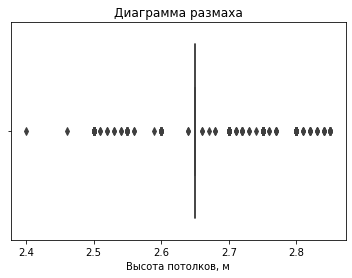

In [91]:
sns.boxplot(peter_center['ceiling_height'])
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков, м')
plt.show()

In [92]:
peter_center['days_exposition'].describe()

count    855.00000
mean     165.11345
std      124.28679
min       30.00000
25%       62.00000
50%      119.00000
75%      223.50000
max      509.00000
Name: days_exposition, dtype: float64

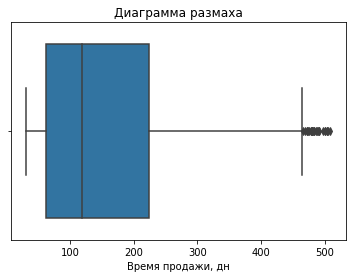

In [93]:
sns.boxplot(peter_center['days_exposition'])
plt.title('Диаграмма размаха')
plt.xlabel('Время продажи, дн')
plt.show()

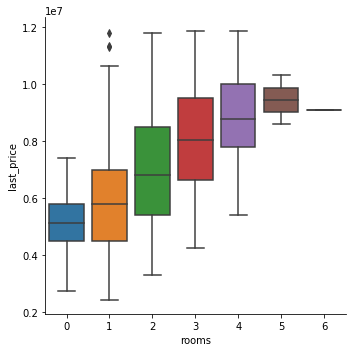

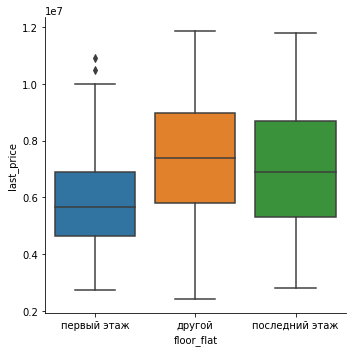

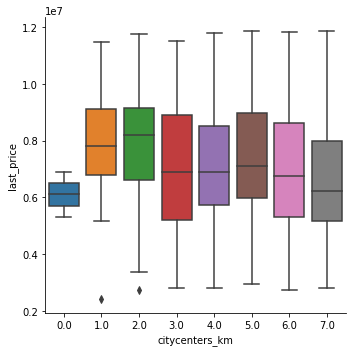

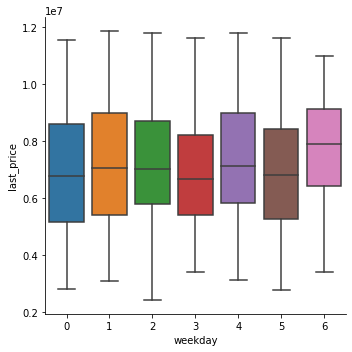

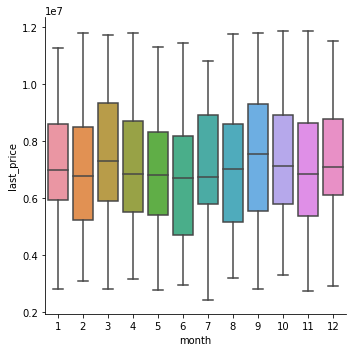

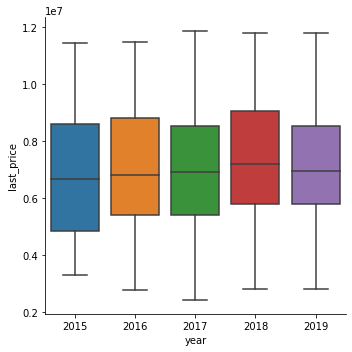

In [94]:
for column in ['rooms', 'floor_flat', 'citycenters_km', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y='last_price', kind="box", data=peter_center)
    

### Вывод для шага 4.

#### 1) Изучение параметров: площади, цены, числа комнат, высоты потолков, срока продажи квартиры

Стандартной квартирой исходя из исследований можно считать 2-комнатную квартира площадью 50 кв. м с потолками до 2,6 м, проданная за 3 месяца (95 дней) по цене 5 млн рублей.

Но есть много недочетов в видеаАномальные данных о квартирах из исходной таблицы:

- 7-комнатная квартира или больше
- площадью более 114,3 кв. м
- с потолками менее 2,25 м или более 3,05 м
- по цене более 11,9 млн рублей
- проданная за 14 месяцев (428 дней) или более

Срок продажи квартиры. Как правило, продажа недвижимости занимала 3 месяца (95 дней). При этом четверть всех объектов недвижимости была продана в течение 45 дней с момента публикации. Е

#### 2) Факторы, влияющие на стоимость квартиры

Наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,65).
Расстояние до центра города также, очевидно, влияет на стоимость квартиры, но обратно пропорционально и не так сильно (коэфф. корреляции -0,2).

Цена квартиры напрямую зависит от числа комнат: чем их больше, тем квартира дороже. Но это вернодо тех пор пока число комнат не превышает четырех, так как скорей всего на квартиры с большим числом комнат небольшой спрос.

Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.

День недели и месяц публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан.
Исследование лишь показало, что в среднем квартиры продавались по более высоким ценам в 2014 году.

#### 3) 10 населенных пунктов с наибольшим числом объявлений

Из представленных 10 населенных пунктов с наибольшим числом объявлений лидеры по средней цене квадратного метра: Санкт-Петербург, Пушкин, деревня Кудрово и поселок Парголово.

Однако в среднем дешевле всего квадратные метры в Выборге и Всеволожске.

#### 4) Выделите сегмент квартир в центре

Стандартной квартирой в центре Санкт-Петербурга исходя из исследований можно считать 2-комнатную квартира площадью 60 кв. м с потолками до 2,65 м, проданная за примерно 4 месяца (119 дней) по цене 7 млн рублей.

Зависимость стоимости квартиры от числа комнат в центре Санкт-Петербурга сильнее: цена увеличивается прямопропорционально с количеством комнат.

Кроме того, в центре города наблюдается явно выраженная зависимость от этажа квартиры: квартира на последнем этаже в среднем будет стоить дороже, чем на первом, но при этом все равно дешевле, чем остальные этажи.

Чем дальше от центра города, тем в среднем квартира будет стоить дешевле: в среднем разница в стоимости между первым и седьмым километром от центра может достигать 2 млн руб.

Странным образом квартиры, объявления о продаже которых публиковались по воскресеньям, продавались в среднем по более высокой цене. Отношение продажи квартиры к месяцу и году почти не изменялось.

### Шаг 5. Общий вывод

Для определения цена влияет множество факторов: расположенность в центре Санкт-Петербурга (0,2), общая площадь квартир (коэфф корреляции 0,65), число комнат и этаж квартиры, время продажи